<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/Hard_and_soft_margin_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

import seaborn as sns; sns.set()




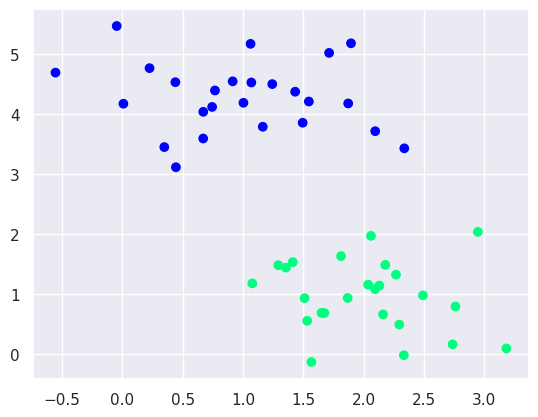

In [5]:
# create the linear data

from  sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 50 , centers=2 , random_state=0 , cluster_std=0.60)

# plot the data
plt.scatter(X[:,0] , X[:,1] , c=y ,cmap = 'winter')

In [6]:
# train a hard margin svm

from sklearn.svm import SVC
svc_1  = SVC(kernel='linear',C=1)
svc_1.fit(X,y)

SVC(C=1, kernel='linear')

In [31]:
# function to plot the decision boundary for the created svm

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



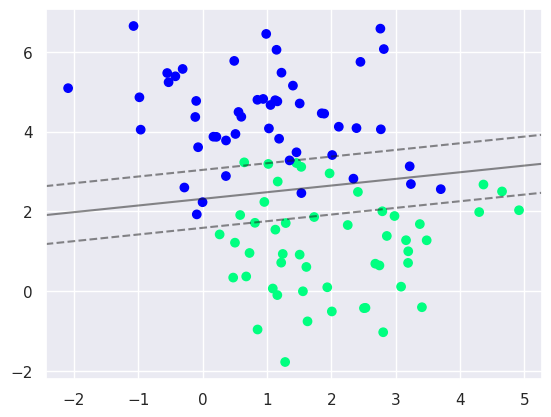

In [33]:
# plot the points
plt.scatter(X[:,0],X[:,1],c=y,cmap ='winter')

# plot the hyperplane
plot_svc_decision_function(svc_1)

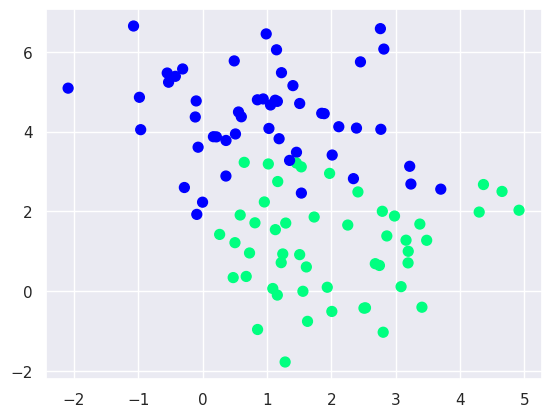

In [16]:
# using a little more complex data

X , y = make_blobs(n_samples = 100 , centers = 2 , random_state = 0 , cluster_std=1.2)

# plot
plt.scatter(X[:,0] , X[:,1] , c=y , s=50,cmap = 'winter')

In [20]:
svc_2 = SVC(kernel = 'linear' , C=0.01)
svc_2.fit(X,y)

SVC(C=0.01, kernel='linear')

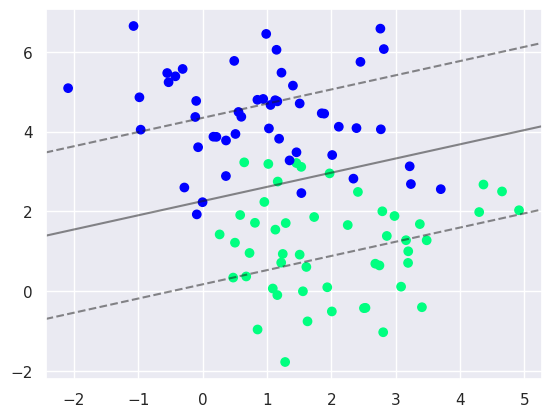

In [22]:
#plot the decision boundary

# plot the data

plt.scatter(X[:,0] , X[:,1] ,c=y ,cmap='winter')

plot_svc_decision_function(svc_2)


# graph for C = 0.01

In [40]:
svc_3 = SVC(kernel='linear',C=100)
svc_3.fit(X,y)

SVC(C=100, kernel='linear')

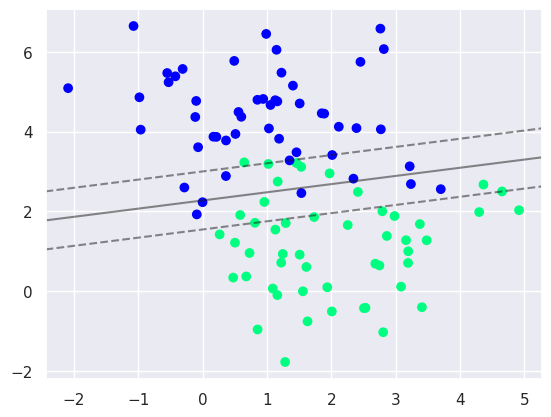

In [41]:
plt.scatter(X[:,0] , X[:,1] ,c=y ,cmap='winter')

plot_svc_decision_function(svc_3)


# graph for C = 100

# C increases -> margin and misclassification decreases and model overfits

# C decreases -> magin and misclassification increase and models underfits